In [ ]:
!git clone https://github.com/Data-Science-Amdari/medoptix-ai-internship.git

Cloning into 'medoptix-ai-internship'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 52 (delta 11), reused 51 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 4.33 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# MedOptix AI – Exploratory Data Analysis (EDA)


## Project Overview
As part of the MedOptix AI Internship Project, this notebook focuses on Exploratory Data Analysis (EDA) to:

- Understand patient behavior in orthopedic therapy programs

- Identify key features influencing dropout rates and adherence

- Prepare features for patient segmentation and predictive modeling

The insights derived here will support:

- Personalized treatment planning

- Proactive intervention for high-risk patients

- Behavioral segmentation into personas like Fast Improvers, Frustrated Droppers, and Steady Progressors



## Table of Contents
1. Data Loading and Overview

2. Data Cleaning and Preprocessing

3.  Univariate Analysis

4. Bivariate Analysis

5. Conclusion & Next Steps

# 1. Data Loading and Overview

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
patients = pd.read_csv("/content/medoptix-ai-internship/medoptix_data/raw/patients.csv")
sessions = pd.read_csv("/content/medoptix-ai-internship/medoptix_data/raw/sessions.csv")
feedback = pd.read_csv("/content/medoptix-ai-internship/medoptix_data/raw/feedback.csv")
clinics = pd.read_csv("/content/medoptix-ai-internship/medoptix_data/raw/clinics.csv")
dropouts = pd.read_csv("/content/medoptix-ai-internship/medoptix_data/raw/dropout_flags.csv")

# Preview
display(patients.head())
display(sessions.head())
display(feedback.head())
display(clinics.head())
display(dropouts.head())



,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type
0,1,29,Male,23.9,False,NaN,Knee,2025-04-27 00:12:44.286283,Insurance,True,6,Public
1,2,68,Female,31.7,True,NaN,Shoulder,2024-11-28 00:12:44.286283,Insurance,False,3,Public
2,3,64,Male,27.5,False,NaN,Hip,2024-10-10 00:12:44.286283,GP,True,5,Public
3,4,41,Female,26.1,False,NaN,Back,2024-12-12 00:12:44.286283,GP,True,2,Private-Premium
4,5,22,Female,21.3,False,NaN,Shoulder,2025-03-28 00:12:44.286283,Insurance,True,4,Private-Basic


,session_id,patient_id,date,week,duration,pain_level,exercise_type,home_adherence_pc,satisfaction,therapist_id
0,315291cb2a5c4c29a65810cd5ec7dcb4,1,2025-05-02 00:12:44.286283,1,40,6,Balance,51,6,1162
1,2a62e7445d3f43b8849a514a0c27210a,1,2025-04-30 00:12:44.286283,1,59,6,Hydrotherapy,100,7,1022
2,5437794f3f3246ca8e582b983e9d9766,1,2025-05-08 00:12:44.286283,2,33,4,Stretching,80,6,1010
3,e0c78ac4bd6a4ed8b02c10ee0ae11348,1,2025-05-05 00:12:44.286283,2,44,4,Ultrasound,85,8,1161
4,3940a79f93934154a4c4072b1079a136,1,2025-05-14 00:12:44.286283,3,58,4,Stretching,44,3,1185


,feedback_id,session_id,comments,sentiment
0,435defdee63547a4b33eca22aaa11e84,07b1b624b7df4be88d2be78952da2aa9,Would like longer sessions,0.361
1,cb6ef4c049244b998a91cfe0f811d1b9,febf205bd6e34cf6bb1788dcbd638a14,Therapist very helpful,0.475
2,a8e89e618e824b8a87a6db50e84ccfce,cf1ab3cb36e54f4a896c5004a001c068,Feeling motivated,0.542
3,32c5cf202ffe438883ca8cf963a1b65f,d6b2508403fa4bec811dc4c8cc8c722e,Great progress today!,0.802
4,a17e9e471a3d4c3692b9d2f8267bc4c7,e4003c56d70a448bbcfaed7e34f50850,Noticeable improvement,0.459


,clinic_id,city,country,type,postcode,capacity,staff_count,speciality,avg_rating
0,1,London,UK,NHS,1184,109,26,Neuro-rehab,4.7
1,2,Manchester,UK,Private,39611,144,13,Neuro-rehab,3.7
2,3,Birmingham,UK,NHS,24119,153,30,Neuro-rehab,4.6
3,4,Berlin,DE,Private,42939,176,21,Sports PT,4.2
4,5,Munich,DE,NHS,12254,150,19,Sports PT,4.4


,patient_id,dropout,dropout_week
0,1,False,NaN
1,2,False,NaN
2,3,False,NaN
3,4,False,NaN
4,5,False,NaN


# 2. Data Cleaning and Preprocessing

In [ ]:
# Convert dates
patients['signup_date'] = pd.to_datetime(patients['signup_date'])
sessions['date'] = pd.to_datetime(sessions['date'])

# Remove duplicates
patients.drop_duplicates(inplace=True)


In [ ]:
patients.isnull().sum()

,0
patient_id,0
age,0
gender,0
bmi,0
smoker,0
chronic_cond,3069
injury_type,0
signup_date,0
referral_source,0
consent,0


## Observation
- Chronic Condition has 3069 missing information

In [ ]:
patients[patients['chronic_cond'].notnull()]

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type
6,7,47,Female,19.4,False,Hypertension,Neck,2025-01-18 00:12:44.286283,GP,True,5,Public
7,8,77,Female,29.5,True,Hypertension,Back,2024-11-18 00:12:44.286283,GP,True,5,Public
15,16,20,Female,21.7,False,Asthma,Hip,2025-04-29 00:12:44.286283,GP,True,4,Private-Premium
17,18,28,Male,25.4,False,Hypertension,Shoulder,2024-11-13 00:12:44.286283,GP,True,5,Public
20,21,79,Female,26.2,False,Cardio,Knee,2025-03-07 00:12:44.286283,Insurance,True,1,Public
...,...,...,...,...,...,...,...,...,...,...,...,...
4986,4987,35,Female,27.5,False,Diabetes,Shoulder,2025-03-05 00:12:44.286283,GP,True,1,Private-Top-Up
4988,4989,65,Female,27.5,False,Hypertension,Neck,2024-09-02 00:12:44.286283,Self-Referral,True,3,Public
4989,4990,33,Female,28.0,False,Diabetes,Back,2024-06-20 00:12:44.286283,Self-Referral,True,5,Public
4993,4994,27,Female,26.6,False,Diabetes,Knee,2024-11-29 00:12:44.286283,GP,True,1,Public


In [ ]:
patients[patients['chronic_cond'].isnull()]['injury_type'].value_counts()


,count
injury_type,
Back,926
Knee,640
Shoulder,495
Neck,448
Ankle,316
Hip,244


In [ ]:
patients[patients['chronic_cond'].notnull()]['injury_type'].value_counts()


,count
injury_type,
Back,564
Knee,432
Shoulder,317
Neck,262
Ankle,181
Hip,175


In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   patient_id       5000 non-null   int64         
 1   age              5000 non-null   int64         
 2   gender           5000 non-null   object        
 3   bmi              5000 non-null   float64       
 4   smoker           5000 non-null   bool          
 5   chronic_cond     1931 non-null   object        
 6   injury_type      5000 non-null   object        
 7   signup_date      5000 non-null   datetime64[ns]
 8   referral_source  5000 non-null   object        
 9   consent          5000 non-null   bool          
 10  clinic_id        5000 non-null   int64         
 11  insurance_type   5000 non-null   object        
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 400.5+ KB


In [ ]:
dropouts.head(10)

,patient_id,dropout,dropout_week
0,1,False,NaN
1,2,False,NaN
2,3,False,NaN
3,4,False,NaN
4,5,False,NaN
5,6,False,NaN
6,7,False,NaN
7,8,False,NaN
8,9,False,NaN
9,10,False,NaN


In [ ]:
# Create binary indicator for missing chronic_cond values
patients['chronic_cond_missing'] = patients['chronic_cond'].isnull().astype(int)


In [ ]:
patients[['chronic_cond', 'chronic_cond_missing']].head(10)


,chronic_cond,chronic_cond_missing
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1
5,NaN,1
6,Hypertension,0
7,Hypertension,0
8,NaN,1
9,NaN,1


In [ ]:
patients.head()

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,chronic_cond_missing
0,1,29,Male,23.9,False,NaN,Knee,2025-04-27 00:12:44.286283,Insurance,True,6,Public,1
1,2,68,Female,31.7,True,NaN,Shoulder,2024-11-28 00:12:44.286283,Insurance,False,3,Public,1
2,3,64,Male,27.5,False,NaN,Hip,2024-10-10 00:12:44.286283,GP,True,5,Public,1
3,4,41,Female,26.1,False,NaN,Back,2024-12-12 00:12:44.286283,GP,True,2,Private-Premium,1
4,5,22,Female,21.3,False,NaN,Shoulder,2025-03-28 00:12:44.286283,Insurance,True,4,Private-Basic,1


In [ ]:
# Merge patients with dropout_flags on patient_id
patients_merged = patients.merge(dropouts, on='patient_id', how='left')


In [ ]:
# Group and calculate dropout rate by chronic_cond_missing
patients_merged.groupby('chronic_cond_missing')['dropout'].value_counts(normalize=True)


chronic_cond_missing  dropout
0                     False      0.977732
                      True       0.022268
1                     False      0.987618
                      True       0.012382
Name: proportion, dtype: float64

In [ ]:
patients_merged.head(10)

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,chronic_cond_missing,age_group,dropout,dropout_week
0,1,29,Male,23.9,False,NaN,Knee,2025-04-27 00:12:44.286283,Insurance,True,6,Public,1,18–30,False,NaN
1,2,68,Female,31.7,True,NaN,Shoulder,2024-11-28 00:12:44.286283,Insurance,False,3,Public,1,61+,False,NaN
2,3,64,Male,27.5,False,NaN,Hip,2024-10-10 00:12:44.286283,GP,True,5,Public,1,61+,False,NaN
3,4,41,Female,26.1,False,NaN,Back,2024-12-12 00:12:44.286283,GP,True,2,Private-Premium,1,31–45,False,NaN
4,5,22,Female,21.3,False,NaN,Shoulder,2025-03-28 00:12:44.286283,Insurance,True,4,Private-Basic,1,18–30,False,NaN
5,6,83,Male,21.3,False,NaN,Back,2025-01-25 00:12:44.286283,GP,True,4,Private-Premium,1,61+,False,NaN
6,7,47,Female,19.4,False,Hypertension,Neck,2025-01-18 00:12:44.286283,GP,True,5,Public,0,46–60,False,NaN
7,8,77,Female,29.5,True,Hypertension,Back,2024-11-18 00:12:44.286283,GP,True,5,Public,0,61+,False,NaN
8,9,63,Female,26.1,False,NaN,Shoulder,2025-02-22 00:12:44.286283,Self-Referral,True,2,Private-Basic,1,61+,False,NaN
9,10,70,Female,27.3,False,NaN,Back,2025-04-25 00:12:44.286283,GP,True,1,Private-Top-Up,1,61+,False,NaN


### Does `chronic_cond_missing` Influence Dropout?

To determine if the presence of missing values in the `chronic_cond` column correlates with patient dropout, we merged the `patients` and `dropouts` tables and computed dropout proportions.

#### Observed Dropout Rates:

| `chronic_cond_missing` | Dropout | Proportion |
|------------------------|---------|------------|
| 0 (not missing)        | True    | 2.2%       |
| 1 (missing)            | True    | 1.2%       |

####  Insights:

- Surprisingly, patients **with missing chronic condition data had a *lower* dropout rate (1.2%)** than those whose conditions were recorded (2.2%).
- This could indicate **missingness is not random**, or perhaps clinicians only record chronic conditions for patients at higher risk or complexity.
- The difference, while small, might warrant further investigation during modeling.

#### Action:

We'll retain the `chronic_cond_missing` binary flag as a potential **predictive feature** in our modeling pipeline.


# Univariate Analysis

In [ ]:
patients.head(5)

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,chronic_cond_missing
0,1,29,Male,23.9,False,NaN,Knee,2025-04-27 00:12:44.286283,Insurance,True,6,Public,1
1,2,68,Female,31.7,True,NaN,Shoulder,2024-11-28 00:12:44.286283,Insurance,False,3,Public,1
2,3,64,Male,27.5,False,NaN,Hip,2024-10-10 00:12:44.286283,GP,True,5,Public,1
3,4,41,Female,26.1,False,NaN,Back,2024-12-12 00:12:44.286283,GP,True,2,Private-Premium,1
4,5,22,Female,21.3,False,NaN,Shoulder,2025-03-28 00:12:44.286283,Insurance,True,4,Private-Basic,1


In [ ]:
#checking if age column has any missing value

patients['age'].isnull()

,age
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


<Axes: xlabel='age', ylabel='Count'>

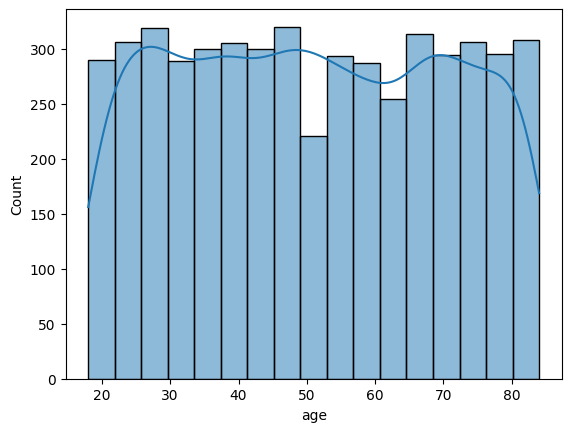

In [ ]:
sns.histplot(patients['age'], kde=True)

In [ ]:
patients['age'].describe()

,age
count,5000.000000
mean,50.907200
std,19.403203
min,18.000000
25%,34.000000
50%,51.000000
75%,68.000000
max,84.000000


In [ ]:
# Define the age bins and corresponding labels
bins = [0, 30, 45, 60, 100]
labels = ['18–30', '31–45', '46–60', '61+']

# Create the age_group column
patients['age_group'] = pd.cut(patients['age'], bins=bins, labels=labels, right=True)

# Check the distribution
patients['age_group'].value_counts()


,count
age_group,
61+,1770
46–60,1121
31–45,1115
18–30,994


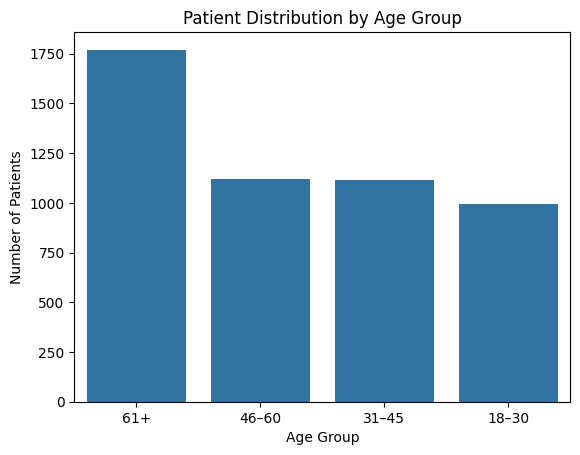

In [ ]:
# Bar plot for age group distribution
sns.countplot(x='age_group', data=patients, order=patients['age_group'].value_counts().index)
plt.title('Patient Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()

# Bivariate Analysis

## Dropout Rate by Age Group

/tmp/ipython-input-22-215916700.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dropout_rate = merged_df.groupby('age_group')['dropout'].mean().reset_index()


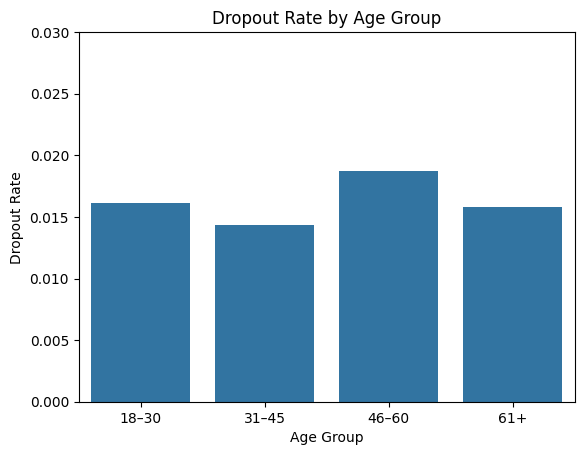

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge patients and dropouts on patient_id
merged_df = patients.merge(dropouts, on='patient_id', how='left')

# Calculate dropout rate per age group
dropout_rate = merged_df.groupby('age_group')['dropout'].mean().reset_index()

# Plot the dropout rate
sns.barplot(x='age_group', y='dropout', data=dropout_rate)
plt.title('Dropout Rate by Age Group')
plt.ylabel('Dropout Rate')
plt.xlabel('Age Group')
# Adjust y-axis to zoom in
plt.ylim(0, 0.03)

plt.show()

###  Age Group Distribution Insights

- **Most patients are seniors (61+)**, followed by the **46–60 age group**.
- **Younger patients (18–30)** are the **smallest group**.
- This **imbalance might influence** trends like:
  - Dropout rate
  - Pain recovery
  - Session attendance

It's worth comparing these behaviors across `age_group` to understand patient engagement patterns.


## Droprate by age group with Gender

/tmp/ipython-input-29-1280747455.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dropout_rate_gender = patients_merged.groupby(['age_group', 'gender'])['dropout'].mean().reset_index()


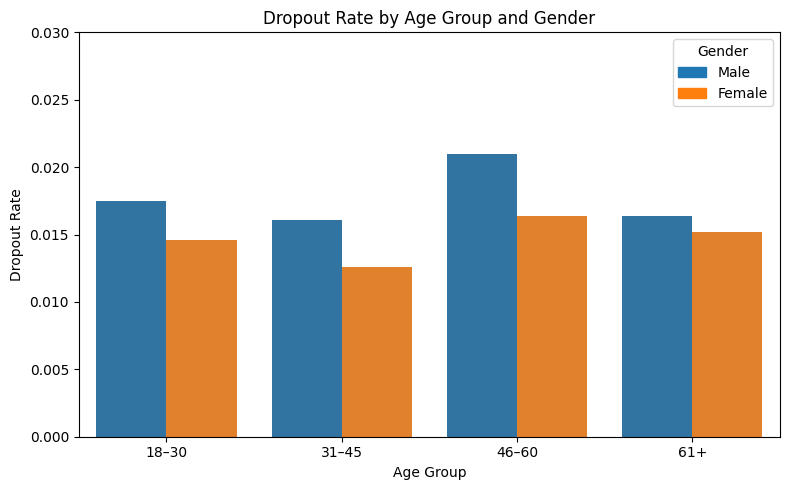

In [ ]:
from matplotlib.patches import Patch

# Step 1: Group data by age_group and gender, then calculate dropout rate
dropout_rate_gender = patients_merged.groupby(['age_group', 'gender'])['dropout'].mean().reset_index()

# Step 2: Plot the grouped barplot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=dropout_rate_gender, x='age_group', y='dropout', hue='gender')

# Step 3: Add plot customizations
plt.title('Dropout Rate by Age Group and Gender')
plt.ylabel('Dropout Rate')
plt.xlabel('Age Group')
plt.ylim(0, 0.03)

# Step 4: Manually set legend with correct colors
legend_handles = [
    Patch(color='tab:blue', label='Male'),
    Patch(color='tab:orange', label='Female')
]
plt.legend(handles=legend_handles, title='Gender')

# Step 5: Show the plot
plt.tight_layout()
plt.show()

### Dropout Rate by Age Group and Gender – Observations

#### 🔺 Higher Dropout in Males Across All Age Groups
- Across every age group (18–30, 31–45, 46–60, 61+), **male patients consistently have a higher dropout rate** than females.

#### Peak Dropout in the 46–60 Age Group
- The **highest dropout rate is seen in males aged 46–60**, could mean  this group may face barriers

####  Females in 31–45 Have the Lowest Dropout
- Among females, the **31–45 age group shows the lowest dropout rate**

####  Dropout Rate Gap Narrows with Age
- In the **oldest group (61+)**, the **difference between male and female dropout rates narrows**, could hint that gender-based differences may **diminish in older patients**.

---




### **Droupout by City and Clinic**

In [ ]:
dropout_by_city = patients_merged.merge(clinics, on = 'clinic_id', how = 'left')
dropout_by_city

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,...,dropout,dropout_week,city,country,type,postcode,capacity,staff_count,speciality,avg_rating
0,1,29,Male,23.9,False,NaN,Knee,2025-04-27 00:12:44.286283,Insurance,True,...,False,NaN,Leeds,UK,NHS,25336,193,19,Orthopedic PT,4.2
1,2,68,Female,31.7,True,NaN,Shoulder,2024-11-28 00:12:44.286283,Insurance,False,...,False,NaN,Birmingham,UK,NHS,24119,153,30,Neuro-rehab,4.6
2,3,64,Male,27.5,False,NaN,Hip,2024-10-10 00:12:44.286283,GP,True,...,False,NaN,Munich,DE,NHS,12254,150,19,Sports PT,4.4
3,4,41,Female,26.1,False,NaN,Back,2024-12-12 00:12:44.286283,GP,True,...,False,NaN,Manchester,UK,Private,39611,144,13,Neuro-rehab,3.7
4,5,22,Female,21.3,False,NaN,Shoulder,2025-03-28 00:12:44.286283,Insurance,True,...,False,NaN,Berlin,DE,Private,42939,176,21,Sports PT,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,33,Female,30.1,True,Diabetes,Back,2024-11-05 00:12:44.286283,Self-Referral,True,...,True,10.0,Berlin,DE,Private,42939,176,21,Sports PT,4.2
4996,4997,79,Female,20.7,False,NaN,Shoulder,2024-09-14 00:12:44.286283,Self-Referral,True,...,False,NaN,Manchester,UK,Private,39611,144,13,Neuro-rehab,3.7
4997,4998,54,Female,23.4,False,NaN,Back,2025-02-28 00:12:44.286283,GP,True,...,False,NaN,London,UK,NHS,1184,109,26,Neuro-rehab,4.7
4998,4999,84,Male,28.7,False,NaN,Knee,2024-06-17 00:12:44.286283,GP,True,...,False,NaN,Birmingham,UK,NHS,24119,153,30,Neuro-rehab,4.6


In [ ]:
dropout_by_city.groupby('city')['dropout'].mean()

,dropout
city,
Berlin,0.013590
Birmingham,0.017260
Glasgow,0.032258
Hamburg,0.000000
Leeds,0.008475
London,0.020713
Manchester,0.017857
Munich,0.012821


###  Dropout Rate by City – Observations

#### 🔺 Glasgow Has the Highest Dropout Rate (3.23%)
- This is **significantly higher than other cities**.
- Could be via:
  - Patient engagement challenges
  - Clinic quality or therapist availability
  - Demographic or socioeconomic factors

####  Hamburg Has a 0% Dropout Rate
- Could indicate:
  - **Excellent patient retention**
  - Or **very few patients**, leading to no recorded dropouts

####  Mid-Tier Cities (London, Manchester)
- Dropout rates around **2%**
- Could require investigating:
  - **Clinic type** (NHS vs Private)
  - Therapist-to-patient ratio or care delivery models

#### Leeds Shows the Lowest Dropout (After Hamburg)
- Could reflect:
  - **High treatment efficiency**
  - **Clinic type**

---


In [ ]:
patients_merged

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,chronic_cond_missing,age_group,dropout,dropout_week
0,1,29,Male,23.9,False,NaN,Knee,2025-04-27 00:12:44.286283,Insurance,True,6,Public,1,18–30,False,NaN
1,2,68,Female,31.7,True,NaN,Shoulder,2024-11-28 00:12:44.286283,Insurance,False,3,Public,1,61+,False,NaN
2,3,64,Male,27.5,False,NaN,Hip,2024-10-10 00:12:44.286283,GP,True,5,Public,1,61+,False,NaN
3,4,41,Female,26.1,False,NaN,Back,2024-12-12 00:12:44.286283,GP,True,2,Private-Premium,1,31–45,False,NaN
4,5,22,Female,21.3,False,NaN,Shoulder,2025-03-28 00:12:44.286283,Insurance,True,4,Private-Basic,1,18–30,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,33,Female,30.1,True,Diabetes,Back,2024-11-05 00:12:44.286283,Self-Referral,True,4,Private-Basic,0,31–45,True,10.0
4996,4997,79,Female,20.7,False,NaN,Shoulder,2024-09-14 00:12:44.286283,Self-Referral,True,2,Private-Basic,1,61+,False,NaN
4997,4998,54,Female,23.4,False,NaN,Back,2025-02-28 00:12:44.286283,GP,True,1,Public,1,46–60,False,NaN
4998,4999,84,Male,28.7,False,NaN,Knee,2024-06-17 00:12:44.286283,GP,True,3,Public,1,61+,False,NaN


/tmp/ipython-input-34-909096124.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dropout_by_city, x='dropout', y='city', palette='Blues_d')


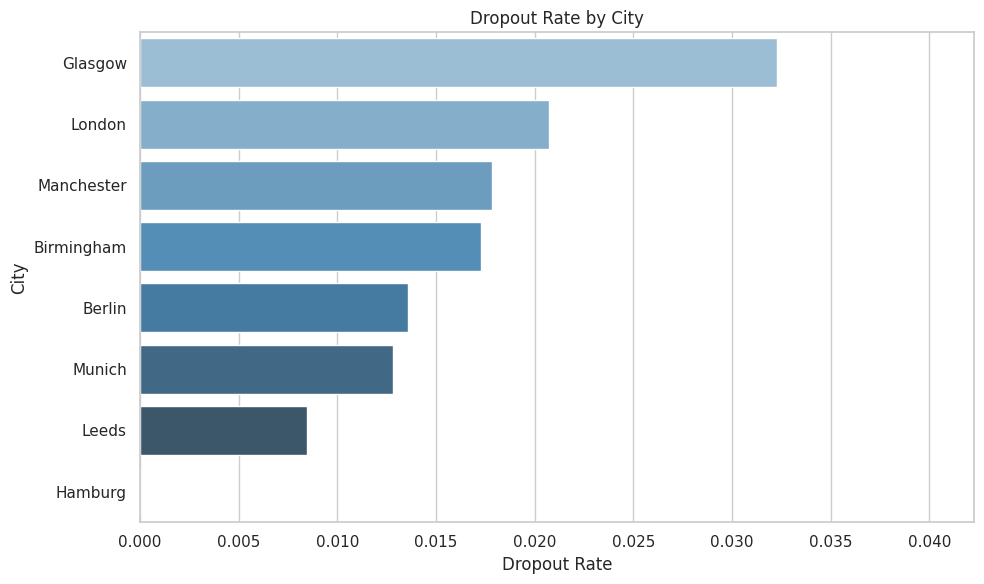

In [ ]:


# Merge patients with dropouts using patient_id
patients_dropout = patients.merge(dropouts, on='patient_id', how='left')

#  Merge with clinics using clinic_id to get city info
patients_full = patients_dropout.merge(clinics, on='clinic_id', how='left')

# Group by city and calculate dropout rate
dropout_by_city = patients_full.groupby('city')['dropout'].mean().reset_index()
dropout_by_city = dropout_by_city.sort_values(by='dropout', ascending=False)

#  Plot dropout rate by city (horizontal barplot)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=dropout_by_city, x='dropout', y='city', palette='Blues_d')

plt.title("Dropout Rate by City")
plt.xlabel("Dropout Rate")
plt.ylabel("City")
plt.xlim(0, dropout_by_city['dropout'].max() + 0.01)
plt.tight_layout()
plt.show()


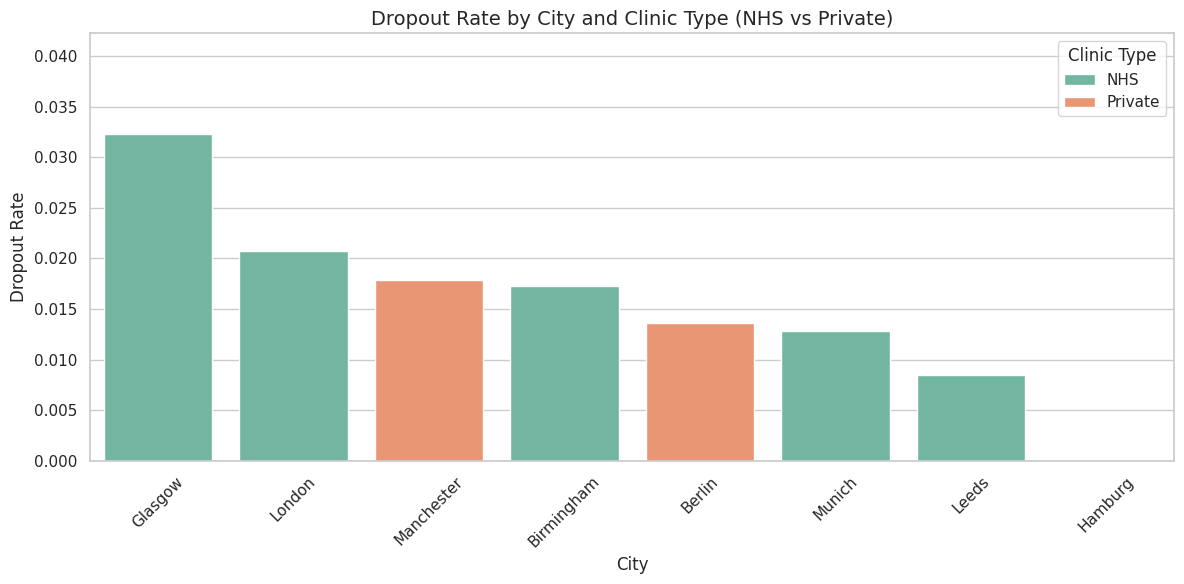

In [ ]:

#  Merge patients with dropouts
patients_dropout = patients.merge(dropouts, on='patient_id', how='left')

#  Merge with clinics to bring in 'city' and 'type' (NHS/private)
patients_full = patients_dropout.merge(clinics, on='clinic_id', how='left')

#  Group by city and clinic type
dropout_city_clinic = (
    patients_full
    .groupby(['city', 'type'])['dropout']
    .mean()
    .reset_index()
    .sort_values('dropout', ascending=False)
)

# Plot grouped barplot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=dropout_city_clinic, x='city', y='dropout', hue='type', palette='Set2')

# Add titles and labels
plt.title("Dropout Rate by City and Clinic Type (NHS vs Private)", fontsize=14)
plt.xlabel("City")
plt.ylabel("Dropout Rate")
plt.xticks(rotation=45)
plt.ylim(0, dropout_city_clinic['dropout'].max() + 0.01)
plt.legend(title='Clinic Type')
plt.tight_layout()
plt.show()


###  Clinic Dropout Observations

#### 🔹NHS:

- Higher dropout rates overall — especially visible in cities like **Glasgow** and **London**.
- **Glasgow NHS clinics** report the **highest dropout rate (~3.2%)**, indicating possible challenges such as longer wait times, reduced personalized care, or patient disengagement.
- Cities like **Birmingham** and **Munich** also show NHS dropout rates that are **higher than their private counterparts**.
- **Exception:** **Leeds NHS clinics** have an impressively **low dropout rate (~0.9%)**, signaling strong patient retention and clinic efficiency.

#### 🔸 Private Clinics:

- Generally **lower dropout rates** — evident in **Manchester** and **Berlin**, where private clinics outperform NHS clinics in retention.
- The more consistent performance across cities suggests **better resource management or patient support systems**.
- Patients in private clinics might be more engaged due to **investment in care or faster services**.


### **Droupout by Week**

In [ ]:
dropout_by_week = dropped['dropout_week'].value_counts()
dropout_by_week

,count
dropout_week,
10.0,50
9.0,22
8.0,7
7.0,2


/tmp/ipython-input-36-3385203599.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropout_by_week.index, y=dropout_by_week.values, palette='viridis')


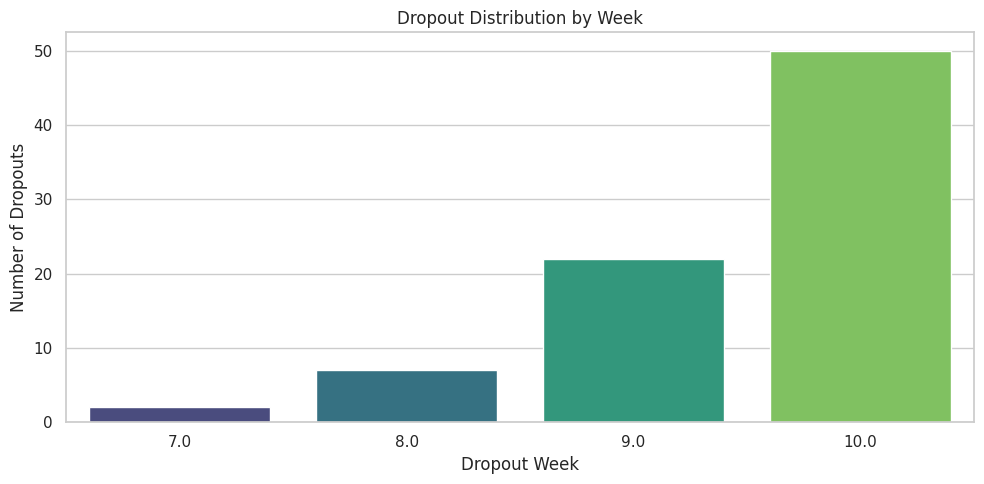

In [ ]:

# Filter only dropped out patients
dropped = dropouts[dropouts['dropout'] == True]

# Count how many dropouts occurred in each week
dropout_by_week = dropped['dropout_week'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=dropout_by_week.index, y=dropout_by_week.values, palette='viridis')
plt.title("Dropout Distribution by Week")
plt.xlabel("Dropout Week")
plt.ylabel("Number of Dropouts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


###  **Observation**

1. **Week 10** has the highest number of dropouts (**50 patients**), could indicate that many patients disengage just before completing the program.

2. **Week 9** also shows a significant number (**22 patients**), possibly marking the start of a downward trend in motivation or satisfaction.

3. **Weeks 7 and 8** see very low dropout counts (2 and 7 respectively), could suggest early therapy phases retain patients better.




### **Dropout by Age Group**

In [ ]:
dropped_merged = dropped.merge(patients[['patient_id', 'age_group']], on='patient_id', how='left')
dropped_merged

,patient_id,dropout,dropout_week,age_group
0,40,True,10.0,61+
1,48,True,10.0,31–45
2,184,True,10.0,31–45
3,314,True,9.0,46–60
4,315,True,10.0,61+
...,...,...,...,...
76,4907,True,8.0,31–45
77,4923,True,10.0,61+
78,4950,True,8.0,61+
79,4991,True,9.0,31–45


In [ ]:
age_dropout = dropped_merged['age_group'].value_counts().sort_index()
age_dropout

,count
age_group,
18–30,16
31–45,16
46–60,21
61+,28


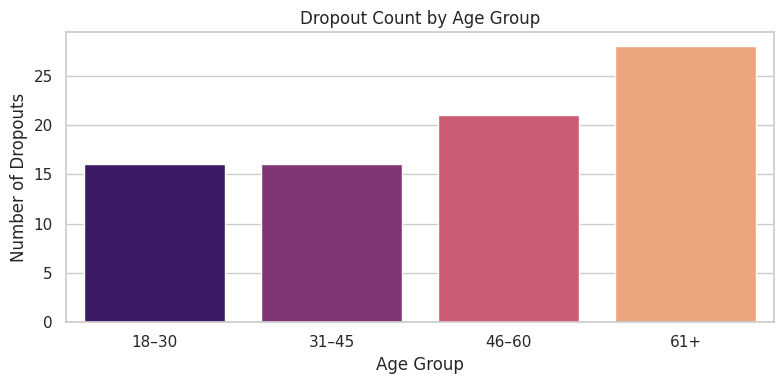

In [ ]:


plt.figure(figsize=(8, 4))
sns.barplot(x=age_dropout.index, y=age_dropout.values, palette='magma')
plt.title('Dropout Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Dropouts')
plt.tight_layout()
plt.show()


### Observation: Dropout Count by Age Group

- **Senior patients (61+) have the highest number of dropouts** — with nearly **28 patients** dropping out.  


- The **46–60 age group** follows closely with **21 dropouts**

- **Younger age groups (18–30 and 31–45)** show **lower dropout rates**, with around **16 patients each**, could suggest **better engagement** or **higher motivation**.


In [ ]:
sessions.columns

Index(['session_id', 'patient_id', 'date', 'week', 'duration', 'pain_level',
       'exercise_type', 'home_adherence_pc', 'satisfaction', 'therapist_id'],
      dtype='object')

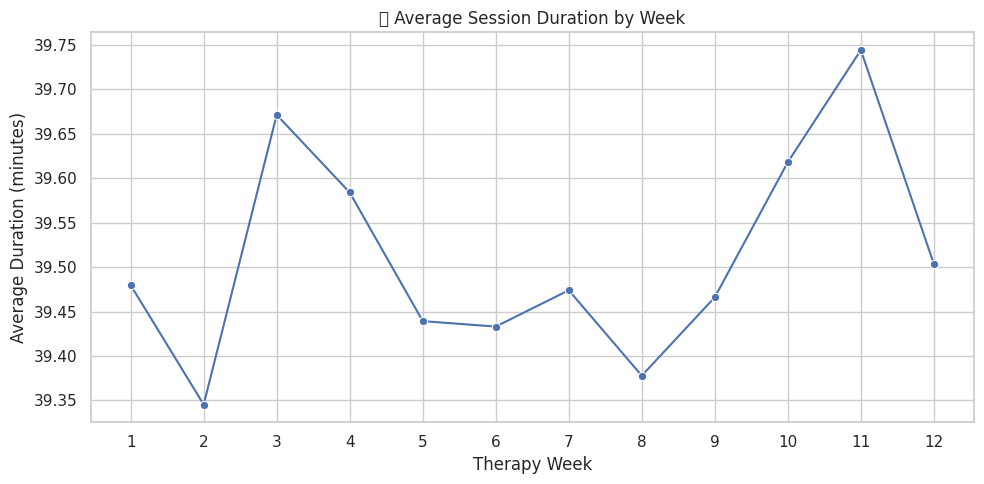

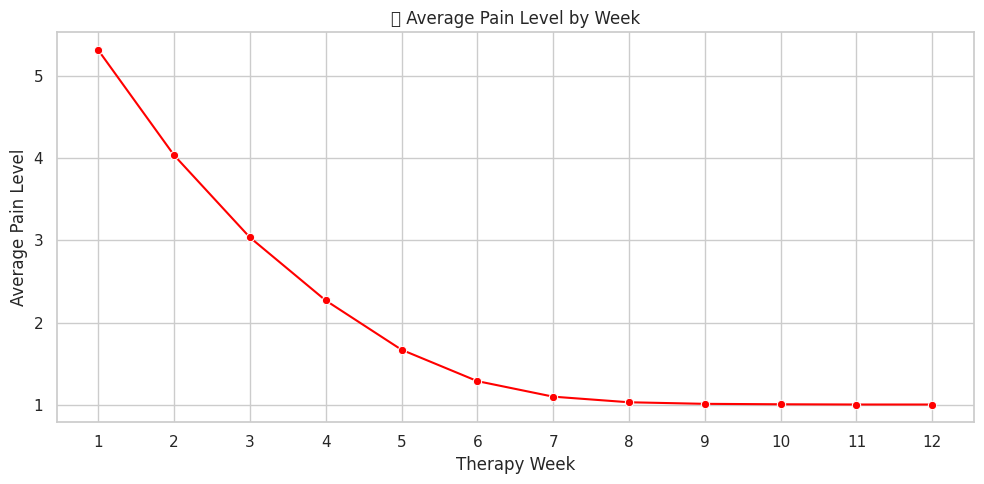

In [ ]:

# Group by 'week' and calculate average 'duration' and 'pain_level'
weekly_avg = sessions.groupby('week')[['duration', 'pain_level']].mean().reset_index()

# Set plot style
sns.set(style='whitegrid')

# average session duration by week
plt.figure(figsize=(10, 5))
sns.lineplot(data=weekly_avg, x='week', y='duration', marker='o')
plt.title('Average Session Duration by Week')
plt.xlabel('Therapy Week')
plt.ylabel('Average Duration (minutes)')
plt.xticks(weekly_avg['week'])
plt.tight_layout()
plt.show()

# average pain level by week
plt.figure(figsize=(10, 5))
sns.lineplot(data=weekly_avg, x='week', y='pain_level', marker='o', color='red')
plt.title('Average Pain Level by Week')
plt.xlabel('Therapy Week')
plt.ylabel('Average Pain Level')
plt.xticks(weekly_avg['week'])
plt.tight_layout()
plt.show()


### Observation: Average Session Duration by Therapy Week

#### Stable Duration Throughout  
The average session duration hovers between **39.3–39.7 minutes**, could indicate **consistent session lengths** across the 12-week program.

#### Slight Increase in Later Weeks  
Minor peaks are observed in **weeks 3, 10, and 11**

####  No Major Drop in Duration  
Even toward the later weeks (when dropouts tend to happen), **session time doesn't reduce**, suggesting therapists maintain **full session engagement** even when patients might be losing interest.


###  Observation: Average Pain Level by Therapy Week

####  Strong Downward Trend  
Pain level decreases steadily from **week 1 (5.3)** to **week 12 (~1.0)**, demonstrating the **effectiveness of treatment** across the therapy program.

#### Most Improvement Happens Early  
A sharp drop occurs within the **first 4 weeks** (from 5.3 to ~2.3), suggesting that:
- Patients experience the **greatest relief early on**
- Early improvement could be a **key motivator** for continued engagement

#### Plateau Around Weeks 8–12  
From **week 8 onward**, pain levels **stabilize around 1.0**, which might indicate:
- Patients reach a **pain management threshold**
- **Remaining symptoms** become more resistant to further treatment


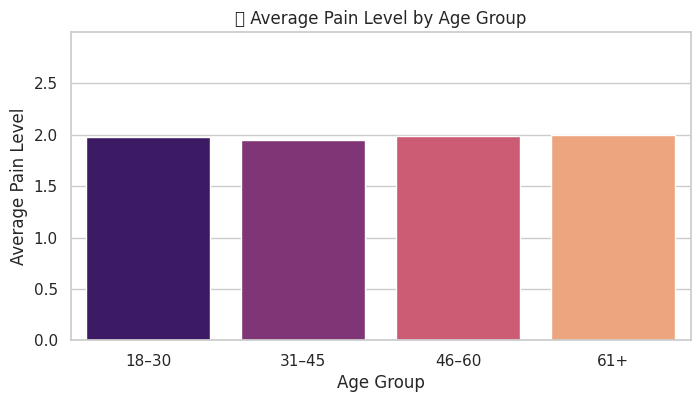

In [ ]:

# Merge with sessions to get pain levels per age group
sessions_age = sessions.merge(patients[['patient_id', 'age_group']], on='patient_id')

# Group and calculate mean pain
age_pain = sessions_age.groupby('age_group')['pain_level'].mean().reset_index()

# Plot
plt.figure(figsize=(8,4))
sns.barplot(data=age_pain, x='age_group', y='pain_level', palette='magma')
plt.title('🩺 Average Pain Level by Age Group')
plt.ylabel('Average Pain Level')
plt.xlabel('Age Group')
plt.ylim(0, age_pain['pain_level'].max() + 1)
plt.show()


### Observation: Average Pain Level by Age Group

**Consistent Pain Levels Across Age Groups**  
The average pain level remains around **2.0** for all age groups, showing minimal variation.

**Seniors (61+) Report Slightly Higher Pain**  
Patients aged **61 and above** show the **highest average pain level**, though only marginally higher than other groups.  

**Younger Groups (18–45) Report Slightly Lower Pain**  
The **18–30** and **31–45** groups show the **lowest average pain levels**, possibly due to faster recovery or better physical resilience.


In [ ]:
merged_session = sessions.merge(dropouts[['patient_id', 'dropout']], on='patient_id', how='left')
merged_session


,session_id,patient_id,date,week,duration,pain_level,exercise_type,home_adherence_pc,satisfaction,therapist_id,dropout
0,315291cb2a5c4c29a65810cd5ec7dcb4,1,2025-05-02 00:12:44.286283,1,40,6,Balance,51,6,1162,False
1,2a62e7445d3f43b8849a514a0c27210a,1,2025-04-30 00:12:44.286283,1,59,6,Hydrotherapy,100,7,1022,False
2,5437794f3f3246ca8e582b983e9d9766,1,2025-05-08 00:12:44.286283,2,33,4,Stretching,80,6,1010,False
3,e0c78ac4bd6a4ed8b02c10ee0ae11348,1,2025-05-05 00:12:44.286283,2,44,4,Ultrasound,85,8,1161,False
4,3940a79f93934154a4c4072b1079a136,1,2025-05-14 00:12:44.286283,3,58,4,Stretching,44,3,1185,False
...,...,...,...,...,...,...,...,...,...,...,...
70231,6efdec75931645988c872ff56275d84c,5000,2025-03-19 00:12:44.286283,9,35,1,Stretching,61,7,1061,False
70232,671e07a9dc684b73a5f49cfac0bf354d,5000,2025-03-28 00:12:44.286283,10,26,1,Hydrotherapy,81,4,1183,False
70233,ac3592b1a5c94d6f888b744aed34e6fc,5000,2025-04-02 00:12:44.286283,11,42,1,Stretching,73,7,1078,False
70234,7916796ffed0455db921a5fe004b9d51,5000,2025-04-11 00:12:44.286283,12,42,1,Ultrasound,88,7,1055,False


In [ ]:
pain_by_dropout = merged_session.groupby('dropout')['pain_level'].mean().reset_index()
pain_by_dropout

,dropout,pain_level
0,False,1.979887
1,True,2.214286


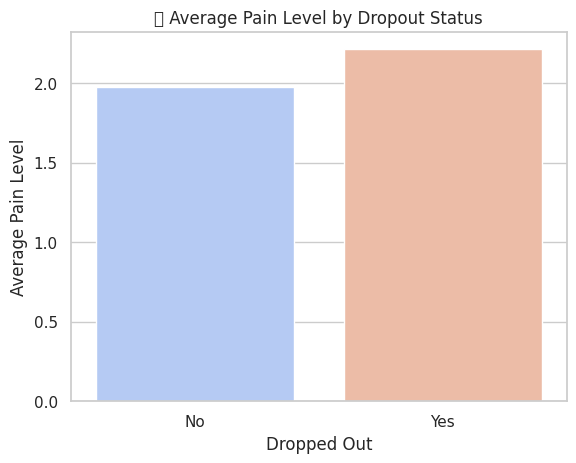

In [ ]:

sns.barplot(data=pain_by_dropout, x='dropout', y='pain_level', palette='coolwarm')
plt.title('🔎 Average Pain Level by Dropout Status')
plt.xlabel('Dropped Out')
plt.ylabel('Average Pain Level')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


---

### **Observation: Average Pain Level by Dropout Status**

1. **Patients Who Dropped Out Report Higher Pain**  
   Those who eventually dropped out had a **higher average pain level (~2.2)** compared to those who completed their therapy (**~2.0**).  
   This suggests that **unmanaged or persistent pain** may be a key factor influencing dropout behavior.

2. **Pain as a Dropout Indicator**  
   The pain difference, while moderate, indicates that **higher discomfort may reduce motivation or perceived treatment effectiveness**, leading to disengagement.






#**Conclusion and Next Steps**

We proceed to feature engineering and model building

In [69]:
!rm -rf medoptix-ai-internship


In [80]:
!git clone  https://github.com/nwanduben/medoptix-ai-internship

Cloning into 'medoptix-ai-internship'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 52 (delta 11), reused 51 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 4.33 MiB | 16.06 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [81]:
%cd medoptix-ai-internship


/content/medoptix-ai-internship/medoptix-ai-internship


In [82]:
!git checkout -b eda-Benjamin-Nwandu


Switched to a new branch 'eda-Benjamin-Nwandu'


In [88]:
from google.colab import files
files.upload()

Saving EDA_Medoptix.ipynb to EDA_Medoptix.ipynb


{'EDA_Medoptix.ipynb': b'{\n  "nbformat": 4,\n  "nbformat_minor": 0,\n  "metadata": {\n    "colab": {\n      "provenance": []\n    },\n    "kernelspec": {\n      "name": "python3",\n      "display_name": "Python 3"\n    },\n    "language_info": {\n      "name": "python"\n    }\n  },\n  "cells": [\n    {\n      "cell_type": "code",\n      "source": [\n        "!git clone https://github.com/Data-Science-Amdari/medoptix-ai-internship.git"\n      ],\n      "metadata": {\n        "colab": {\n          "base_uri": "https://localhost:8080/"\n        },\n        "id": "p73KHD02R8n7",\n        "outputId": "6d6ce38c-b7a1-4905-d7af-0b75fe283751"\n      },\n      "execution_count": null,\n      "outputs": [\n        {\n          "output_type": "stream",\n          "name": "stdout",\n          "text": [\n            "Cloning into \'medoptix-ai-internship\'...\\n",\n            "remote: Enumerating objects: 52, done.\\u001b[K\\n",\n            "remote: Counting objects: 100% (52/52), done.\\u001b[K\

In [ ]:
import shutil
shutil.copy('/content/your_notebook.ipynb', '/content/medoptix-ai-internship/')


In [84]:
from getpass import getpass

# 🔐 Paste your token here when prompted
token = getpass('Enter your GitHub personal access token:')

# 🔁 Set Git remote with token for push
!git remote set-url origin https://{token}@github.com/nwanduben/medoptix-ai-internship.git

# ✅ Now push
!git push origin main

Enter your GitHub personal access token:··········
Everything up-to-date


In [85]:
!git config --global user.email "nwanduben@gmail.com"
!git config --global user.name "nwanduben"

In [86]:
!git add .
!git config --global user.email "nwanduben@gmail.com"
!git config --global user.name "nwanduben"
!git commit -m "Medopix AI EDA Assignment"



On branch eda-Benjamin-Nwandu
nothing to commit, working tree clean


In [87]:
!git push origin eda-Benjamin-Nwandu

Total 0 (delta 0), reused 0 (delta 0), pack-reused 0
remote: 
remote: Create a pull request for 'eda-Benjamin-Nwandu' on GitHub by visiting:
remote:      https://github.com/nwanduben/medoptix-ai-internship/pull/new/eda-Benjamin-Nwandu
remote: 
To https://github.com/nwanduben/medoptix-ai-internship.git
 * [new branch]      eda-Benjamin-Nwandu -> eda-Benjamin-Nwandu
